# Microsoft-Movie-Analysis

**Author:** Prudence Coredo

**dsc-FT**
***

## Overview

Microsoft have decided to create a new movie studio and require more insight into which types of films are doing best at the box office in order to choose the genre of movies to produce that can generate the most profit.
This project uses descriptive statistical analysis on data gathered from [IMDb website](https://www.imdb.com/) to gain insight into which combination of genres topped the league in these areas.



### Business Understanding

***

Microsoft wants to produce movies, they want to know which types of movies are the most successful. To answer that question both Domestic and Foreign Sales data was analysed to see the most financially successful genres, along with the average rating given and number of votes for each type or genre of movie to see how popularity compared with financial success.

## Data Understanding

IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows.
3 dataset were used for this analysis [bom.movie_gross.csv](../bom.movie_gross.csv), and 2 tables from the imbd database **movie_basics** and **movie_ratings**
***

### Importing the libraries

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading the dataset

In [2]:
#load the first csv file 
movie_gross = pd.read_csv('bom.movie_gross.csv')
df1 = pd.read_csv('tmdb.movies.csv')


#### Previewing the dataset

We need to be able to see what kind of data we are dealing with to better understand what's relevant in the dataset before analysis. 

In [3]:
#viewing the top of the dataset
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
movie_gross.shape

(3387, 5)

In [6]:
#checking number of entries in each column
movie_gross.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

In [7]:
movie_gross['studio'].value_counts()

IFC          166
Uni.         147
WB           140
Magn.        136
Fox          136
            ... 
IW             1
SHO            1
Dreamwest      1
DF             1
Arth.          1
Name: studio, Length: 257, dtype: int64

 Now that we have viewed the first dataset, We can now look at the database data to get an insight of how to relate the different tables

In [8]:
#importing the sql database which is our main dataset
import sqlite3
conn = sqlite3.connect("im.db")

In [9]:
#Viewing tables in the database
data = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
data

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [10]:
#Loading the data from the table movie_basics
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn)['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [13]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn)['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Family,Romance,Sport               1
Action,Documentary,Thriller        1
Comedy,Documentary,War             1
Documentary,Horror,Sci-Fi          1
Animation,Family,Sci-Fi            1
Name: genres, Length: 1085, dtype: int64

In [14]:
#Loading the contents from the table movie_ratings.
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [15]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Data Preparation

***

### Cleaning the data
We need to check for missing and duplicate values, null values before we can merge or query the data to produce graphs


movie_basics

In [16]:
#Checking whether there are any null values in any column in the table movie_basics
movie_basics = pd.read_sql(""" 
SELECT *
FROM movie_basics;""",conn)
movie_basics.isnull().sum()


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [17]:
#Calculating the percentage of null values

null_count = movie_basics.isnull().sum()

#calculating the total number of null values

total_count = movie_basics.shape[0]
print(total_count)
null_percentage = (null_count / total_count) * 100

print(null_percentage)

146144
movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


The above shows that there is a small percantage of null values, so we can do away with them.

In [18]:
movie_basics = movie_basics.dropna()
movie_basics.shape

(112232, 6)

In [19]:
#Changing the data type
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'])
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         112232 non-null  object        
 1   primary_title    112232 non-null  object        
 2   original_title   112232 non-null  object        
 3   start_year       112232 non-null  datetime64[ns]
 4   runtime_minutes  112232 non-null  float64       
 5   genres           112232 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.0+ MB


In [20]:
#Checking for duplicates
movie_basics.duplicated().sum()

0

There are no null values or duplicates in the movie_ratings table

In [21]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

movie_gross

In [22]:
#Checking for null values in movie_gross data
movie_gross.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The foreign_gross column has 39% null values in the data. Instead of dropping all the values which could reduce the significance of our data , we can replace the null values with the median.
The median value is a good choice because it is least likely to influence the distribution of the dataset overall.

In [23]:
# Convert to float
# Replace commas with an empty string, convert to float, and fill missing values with the median
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype(float)
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median(), inplace=True)


In [24]:
movie_gross.duplicated().sum()

0

In [25]:
movie_gross.shape

(3387, 5)

In [26]:
#dropping all the null values
movie_gross = movie_gross.dropna()
movie_gross.shape

(3356, 5)

In [27]:
#checking the data types
#Changing the data type of the column year from int to datetime.
movie_gross['year'] =  pd.to_datetime(movie_gross['year'])
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   foreign_gross   3356 non-null   float64       
 4   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 157.3+ KB


Checking for data inconsistencies

In [28]:
print(movie_gross.describe())
print(movie_basics.describe())
print (movie_ratings.describe())

       domestic_gross  foreign_gross
count    3.356000e+03   3.356000e+03
mean     2.877149e+07   5.284196e+07
std      6.700694e+07   1.104539e+08
min      1.000000e+02   6.000000e+02
25%      1.200000e+05   1.220000e+07
50%      1.400000e+06   1.870000e+07
75%      2.795000e+07   2.970000e+07
max      9.367000e+08   9.605000e+08
       runtime_minutes
count    112232.000000
mean         86.261556
std         167.896646
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06


### Merging Datasets

In [29]:
q = """
SELECT mb.movie_id,
mb.primary_title AS title,
mb.start_year,
mb.runtime_minutes,
mb.genres,
mr.averagerating,
mr.numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr 
ON mb.movie_id = mr.movie_id;
"""
df = pd.read_sql(q, conn)
df

    

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.isnull().sum()
df.shape
df = df.dropna()
df.shape

(65720, 7)

In [32]:
conn.close()

# Exploratory Data Analysis (EDA)

 ### Univariate Analysis

IT gives us the charesteristics or behaviour of an individual variable.

In [33]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


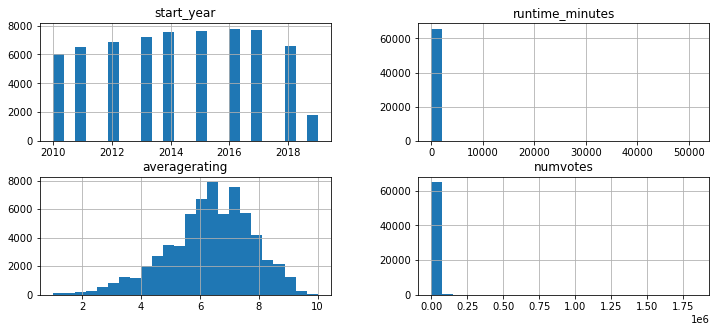

In [34]:
# plotting histograms to visualize patterns in the data
df.hist(figsize = (12,5), bins= 24)
plt.show()

Text(0.5, 1.0, 'Foreign Gross')

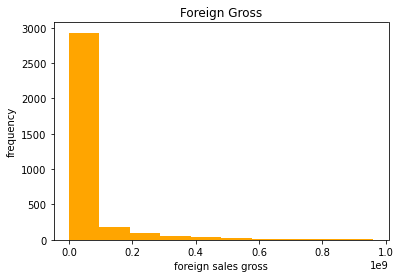

In [35]:
hist_chart_title = "Foreign Gross"

fig, ax = plt.subplots()

# YOUR CODE HERE
foreign = movie_gross['foreign_gross']
ax.hist(foreign, color='Orange')
ax.set_xlabel('foreign sales gross')
ax.set_ylabel("frequency")
ax.set_title(hist_chart_title)


The histogram above shows the distribution of foreign sales.It has a positive skew. The mean and median is greater than the mode

Text(0.5, 1.0, 'Average Ratings')

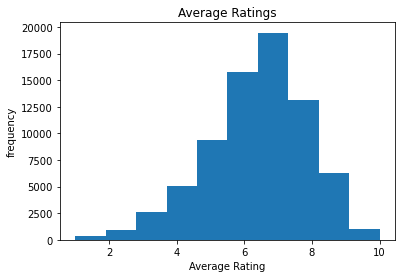

In [36]:
hist_chart_title = "Average Ratings"

fig, ax = plt.subplots()

# YOUR CODE HERE
foreigns = movie_ratings['averagerating']
ax.hist(foreigns)
ax.set_xlabel('Average Rating')
ax.set_ylabel("frequency")
ax.set_title(hist_chart_title)


The histogragh above shows the average ratings.
The data is has a normal distribution

Most movies are rated 7. Majority of the movies released are well accepted by the audience.

##### Measures of central tendency

In [37]:
print('Mean:', foreigns.mean())
print('Median:',foreigns.median())
print('Mode:',foreigns.mode())

Mean: 6.332728552859619
Median: 6.5
Mode: 0    7.0
dtype: float64


Merging all 3 datasets to create a new dataframe.

In [38]:
#merge
merged_df = pd.merge(df,movie_gross, on = 'title' ,how='inner')
merged_df

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,18700000.0,1970-01-01 00:00:00.000002016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,1970-01-01 00:00:00.000002012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,1970-01-01 00:00:00.000002012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,1970-01-01 00:00:00.000002012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,1970-01-01 00:00:00.000002013
...,...,...,...,...,...,...,...,...,...,...,...
2947,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,18700000.0,1970-01-01 00:00:00.000002015
2948,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,1970-01-01 00:00:00.000002018
2949,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,18700000.0,1970-01-01 00:00:00.000002018
2950,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,18700000.0,1970-01-01 00:00:00.000002018




##### What is the relationship between type / combination of genre and average rating.


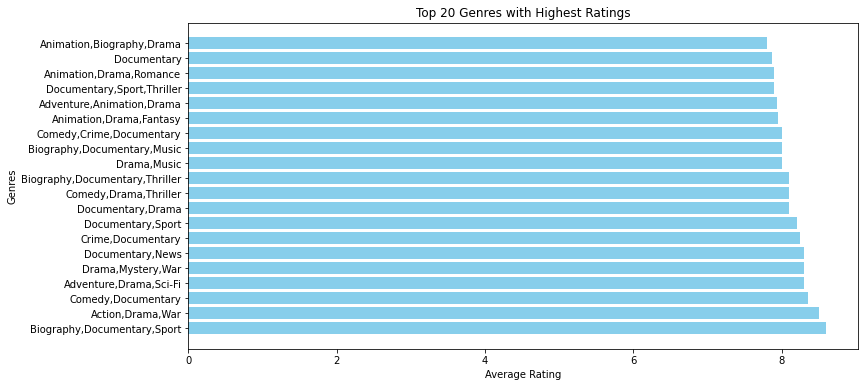

In [39]:
# Select the top 20 genres with the highest ratings that have 15000 or more votes.
top_20_genres = df[df['numvotes']>=20000].groupby('genres').mean().sort_values(by='averagerating', ascending=False)[:20]
top_20_genres

# Extract the data for the chart
genres = top_20_genres.index
ratings = top_20_genres['averagerating']

plt.figure(figsize=(12, 6))  
plt.barh(genres, ratings, color='skyblue')  
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Top 20 Genres with Highest Ratings')
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.show()


In [40]:
top_20_genres

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Biography,Documentary,Sport",2010.000000,106.000000,8.600000,55318.000000
"Action,Drama,War",2016.333333,135.666667,8.500000,170951.000000
"Comedy,Documentary",2014.000000,129.500000,8.350000,31528.500000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000
"Drama,Mystery,War",2010.000000,131.000000,8.300000,124156.000000
"Documentary,News",2016.000000,96.000000,8.300000,23264.000000
"Crime,Documentary",2011.000000,113.000000,8.250000,48209.500000
"Documentary,Sport",2018.000000,100.000000,8.200000,32250.000000
"Documentary,Drama",2013.000000,83.000000,8.100000,56582.000000


Biography,Documentary,Sport combination has the highest rating although has fewer number of votes. However, Adventure,Drama,Sci-Fi has the highest number of votes although it doesn't have the highest average ratings. This suggests that it is a genre that is most popular and loved by the audience.

The above graph shows the top 20 genres that have more than 20,000 votes with the highest ratings.

##### Which genres have the most number of votes

In [41]:
top_numvotes = df.sort_values(by='numvotes',ascending = False)[:20]
top_numvotes

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
507,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
1091,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
15327,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
2831,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
2523,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


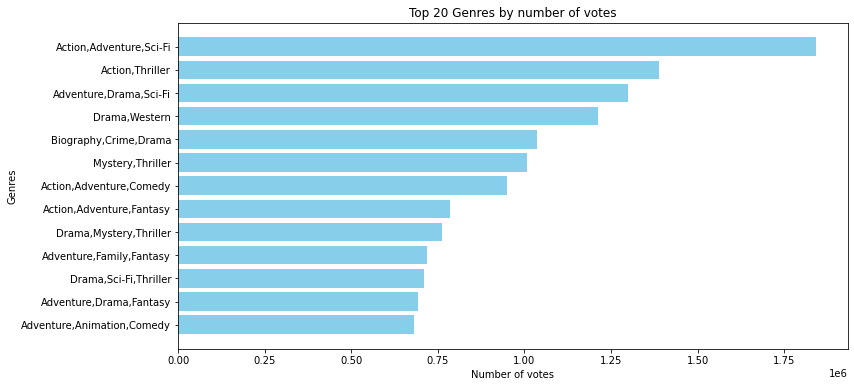

In [42]:
# Extract the data for the chart
genres = top_numvotes['genres']
ratings = top_numvotes['numvotes']

#Plot the bar chart
plt.figure(figsize=(12, 6))  
plt.barh(genres, ratings, color='skyblue')  
plt.xlabel('Number of votes')
plt.ylabel('Genres')
plt.title('Top 20 Genres by number of votes')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.show()

Most recommendend genre combination are 'Adventure, Drama, Sci-fi', 'Action Thriller' and 'Adventure,dram,sci-fi'.

##### Which combinations of genres brought in the most revenue.

In [43]:
top_20_by_revenue = merged_df.groupby('genres').sum().sort_values(by=['foreign_gross'],ascending = False)[:20]
top_20_by_revenue

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross
genres,,,,,,
"Adventure,Animation,Comedy",151065,7084.0,482.9,8037681,9.645133e+09,1.801830e+10
"Action,Adventure,Sci-Fi",94658,6139.0,318.5,19721992,1.102470e+10,1.663010e+10
"Action,Adventure,Fantasy",62467,3655.0,194.9,7763568,4.378787e+09,8.936100e+09
"Action,Adventure,Comedy",64493,3543.0,200.7,5800318,3.172472e+09,6.625100e+09
Drama,606127,31915.0,2010.3,4723982,2.671187e+09,6.577662e+09
"Action,Adventure,Thriller",34238,2116.0,110.1,3634468,1.851798e+09,4.767000e+09
"Action,Adventure,Animation",44311,2205.0,161.8,2749710,2.184660e+09,4.363000e+09
"Action,Adventure,Drama",76526,4482.0,234.1,3849266,1.753573e+09,3.737032e+09
Comedy,185267,9257.0,530.6,3877243,2.357257e+09,3.141074e+09


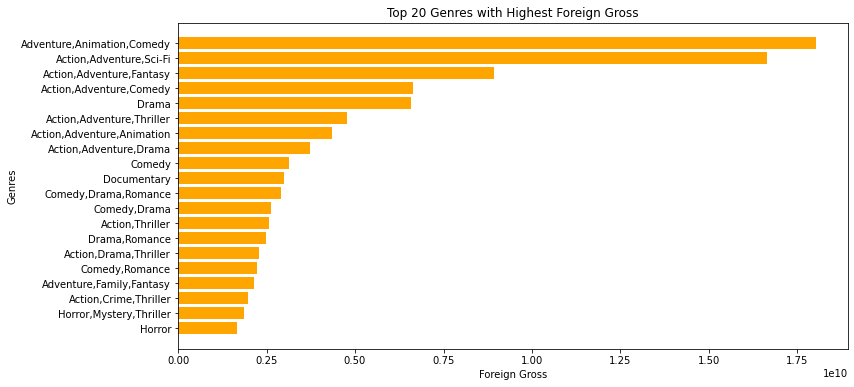

In [44]:
#Extract the data for the chart
genres = top_20_by_revenue.index
ratings = top_20_by_revenue['foreign_gross']

plt.figure(figsize=(12, 6))  
plt.barh(genres, ratings, color='orange')  
plt.xlabel('Foreign Gross')
plt.ylabel('Genres')
plt.title('Top 20 Genres with Highest Foreign Gross')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.show()

##### Genres with most domestic gross

In [45]:
top_20_by_gross = merged_df[merged_df['numvotes'] >=20000].groupby('genres').sum().sort_values(by=['domestic_gross'],ascending = False)[:20]
top_20_by_gross

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross
genres,,,,,,
"Action,Adventure,Sci-Fi",90630,5891.0,309.0,19688665,1.097470e+10,1.658320e+10
"Adventure,Animation,Comedy",108756,5182.0,358.0,7828812,9.098600e+09,1.705270e+10
"Action,Adventure,Fantasy",60449,3541.0,189.4,7762595,4.378600e+09,8.821200e+09
"Action,Adventure,Comedy",38300,2149.0,128.5,5693950,3.133300e+09,5.323900e+09
Comedy,76525,3799.0,221.9,3671254,2.215195e+09,1.883844e+09
"Action,Adventure,Animation",26169,1280.0,96.1,2670162,2.158200e+09,4.129000e+09
"Action,Adventure,Thriller",30209,1798.0,98.8,3608927,1.845500e+09,4.666500e+09
"Action,Comedy,Crime",54371,2873.0,167.9,3412614,1.782709e+09,1.311300e+09
"Action,Adventure,Drama",56378,3281.0,174.9,3761328,1.749350e+09,3.336432e+09


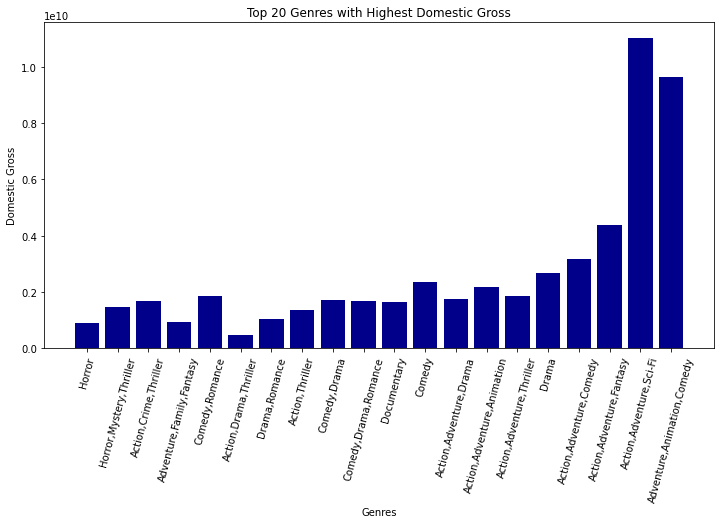

In [46]:
genres = top_20_by_revenue.index
ratings = top_20_by_revenue['domestic_gross']

plt.figure(figsize=(12, 6))  
plt.bar(genres, ratings, color='Darkblue')  
plt.tick_params(axis="x", labelrotation=75)
plt.ylabel('Domestic Gross')
plt.xlabel('Genres')
plt.title('Top 20 Genres with Highest Domestic Gross')
plt.gca().invert_xaxis()  # Invert the y-axis to show the highest rating at the top
plt.show()

 ### Bivariate Analysis

Shows relationship between 2 variables.

We can check the trend in total foreign gross over the years. This can help us get an insight on how the movie industry has been growing over the years and if its a worthy industry to venture in to.

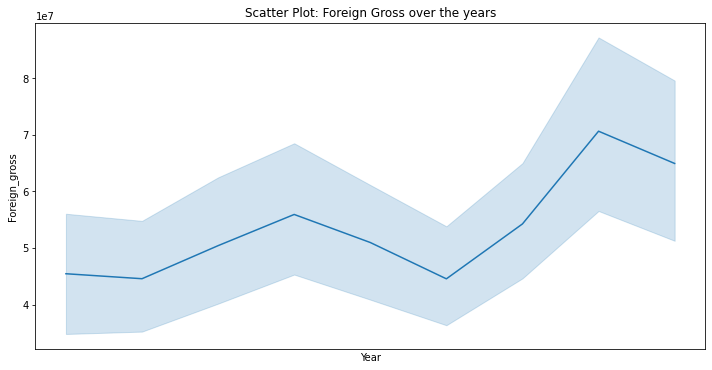

In [47]:
# Scatter plot for foreign_gross vs year
v = merged_df.groupby('start_year')['foreign_gross'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_gross, x='year', y='foreign_gross')
plt.xlabel('Year')
plt.ylabel('Foreign_gross')
plt.title('Scatter Plot: Foreign Gross over the years')
plt.show()

In [48]:
v

start_year
2010    1.476497e+10
2011    1.760309e+10
2012    1.704383e+10
2013    1.923130e+10
2014    1.927196e+10
2015    1.709426e+10
2016    2.146418e+10
2017    2.002154e+10
2018    1.599344e+10
2019    3.167371e+08
Name: foreign_gross, dtype: float64

## Conclusions

#### Evaluation

***

3 of the above graphs, Top 20 Domestic Gross Sales, Top 20 Foreign Gross Sales and Top 20 genres based on number of Votes clearly show that **Adventure, Action and Sci-Fi combination are most successful genre** producing highest profits and is well loved by the audience with high ratings and number of votes. 
Its also clear to see that the adventure genre is popular across the board especially when elements of  action and or comedy are also included.

The graph showing Top 20 Average Ratings shows Drama also does well as a genre in terms of ratings.

**Most recommendend genre combination are 'Adventure, Drama, Sci-fi', 'Action Thriller' and 'Adventure,drama,sci-fi'**.

To improve confidence in the results next time I would:-
Note to take is that some movies have high ratings but not alot of votes hence i would trust data from votes rather ratings.


Include the movie classification This could have narrowed down the target audience the most successful movies were aimed at i.e PG etc.

Broken the data into the relevant years to see if there are changes year by year in the top genres of movies, see if audience tastes change over time.

### Next steps

***

 Questions to consider:

Limitations-Could the same movie be classified into different genres by different audiences? Who classifies the genres for each movie? Can the classification of genres be improved to provide a more benchmark approach? Future analysis could include the movie classification ie PG, MA etc to see which audience the most successful movies were made for.